In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('customers_data.csv', index_col=0)
print(df.shape)
print(df.dtypes)
df.head()

(120000, 6)
purch_amt                float64
gender                    object
card_on_file              object
age                      float64
days_since_last_purch    float64
loyalty                     bool
dtype: object


,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [3]:
df.groupby('loyalty').size()

loyalty
False    100000
True      20000
dtype: int64

In [4]:
df['gender'] = df['gender'].replace(['male', 'female'], [0 ,1])
df['card_on_file'] = df['card_on_file'].replace(['no', 'yes'], [0 ,1])
df['loyalty'] = df['loyalty'].replace([False, True], [0 ,1])
df.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,0,0,31.0,35.0,0
1,65.16,0,1,23.0,61.0,0
2,40.60,1,0,36.0,49.0,0
3,38.01,0,1,47.0,57.0,0
4,22.32,1,1,5.0,39.0,0


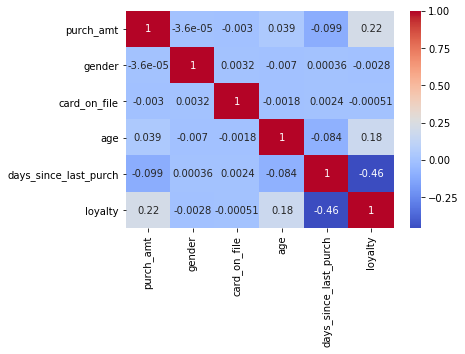

In [5]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

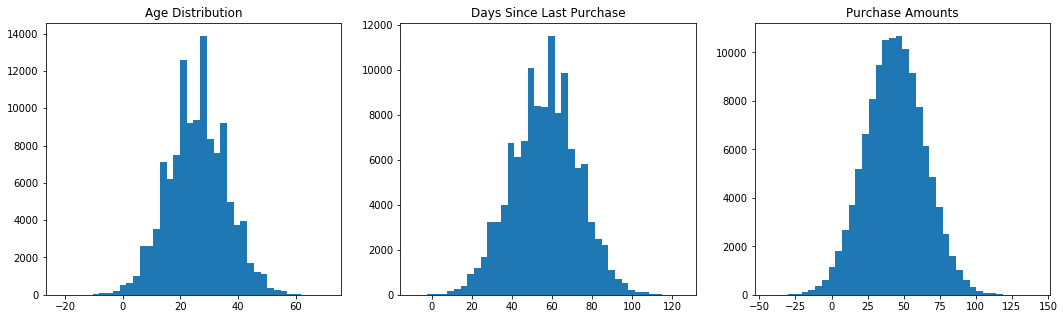

In [6]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.hist(df.age, bins=40)
plt.title('Age Distribution')

plt.subplot(132)
plt.hist(df.days_since_last_purch, bins=40)
plt.title('Days Since Last Purchase')

plt.subplot(133)
plt.hist(df.purch_amt, bins=40)
plt.title('Purchase Amounts')

plt.show()

In [7]:
df = df[df['age'] > 0]
df = df[df['days_since_last_purch'] > 0]

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('loyalty', 1)
y = df.loyalty

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(100)
rfc.fit(X_train, y_train)
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X_train.columns), 
             reverse=True), '\n')

[(0.4238, 'purch_amt'), (0.3626, 'days_since_last_purch'), (0.1806, 'age'), (0.0168, 'card_on_file'), (0.0162, 'gender')] 



In [10]:
X = df.drop(['loyalty', 'gender', 'card_on_file'], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc = RandomForestClassifier(100)
rfc.fit(X_train, y_train)
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X_train.columns), 
             reverse=True), '\n')

[(0.5011, 'purch_amt'), (0.3579, 'days_since_last_purch'), (0.141, 'age')] 



In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score

y_pred = rfc.predict(X_test)
print('RFC Accuracy Score: ', accuracy_score(y_test, y_pred))
print('RFC 5 Cross Validation Scores: ', cross_val_score(rfc, X_train, y_train, cv=5))
print('RFC F1 Scores: ', f1_score(y_test, y_pred, average=None))

RFC Accuracy Score:  0.8471453335570095
RFC 5 Cross Validation Scores:  [0.85154565 0.85543107 0.85207597 0.85254643 0.85440383]
RFC F1 Scores:  [0.91042844 0.47918453]


In [11]:
from sklearn.metrics import confusion_matrix
#a function that will help us plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

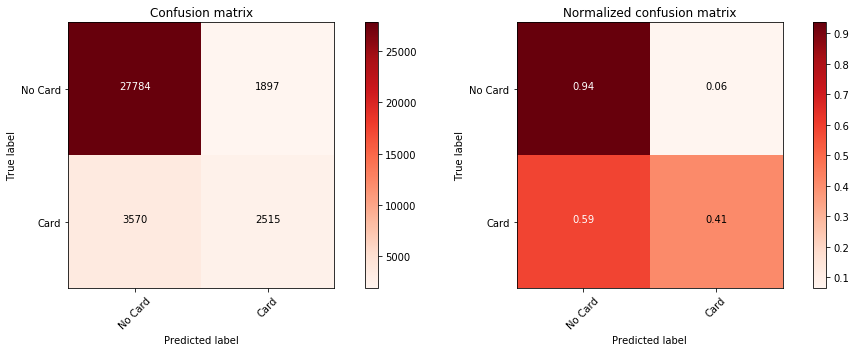

In [12]:
import itertools

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['No Card', 'Card'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['No Card', 'Card'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

In [13]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(C=0.01)
logr.fit(X_train, y_train)
y_pred1 = logr.predict(X_test)
print('LogR Accuracy Score: ', accuracy_score(y_test, y_pred1))
print('LogR 5 Cross Validation Scores: ', cross_val_score(logr, X_train, y_train, cv=5))
print('LogR F1 Scores: ', f1_score(y_test, y_pred1, average=None))

LogR Accuracy Score:  0.8668847508807247
LogR 5 Cross Validation Scores:  [0.87 0.87 0.87 0.87 0.87]
LogR F1 Scores:  [0.92 0.51]


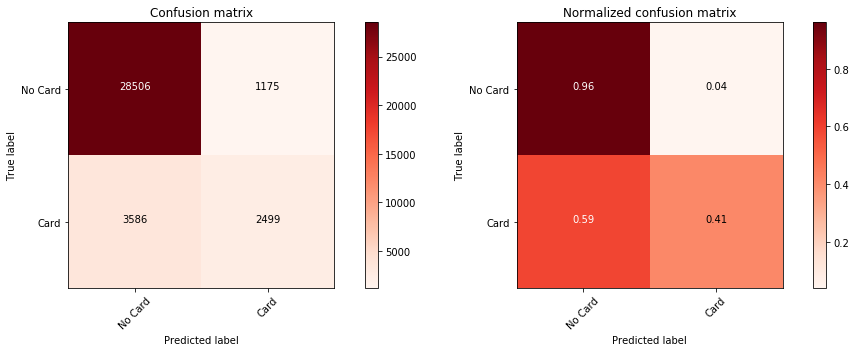

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['No Card', 'Card'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['No Card', 'Card'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

In [15]:
#set up train and test sets from an under sampled data selection
from imblearn.under_sampling import RandomUnderSampler
#random undersampler
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)
#train test split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,
                                                                                            y_resampled, test_size=0.3)
#take a look at the size of our under sampled data sets
print(X_train_resampled.shape)

(27917, 5)


In [18]:
rfc1 = RandomForestClassifier(100)
rfc1.fit(X_train_resampled, y_train_resampled)
y_pred2 = rfc1.predict(X_test_resampled)
print('RFC Accuracy Score: ', accuracy_score(y_test_resampled, y_pred2))
print('RFC 5 Cross Validation Scores: ', cross_val_score(rfc1, X_train_resampled, y_train_resampled, cv=5))
print('RFC F1 Scores: ', f1_score(y_test_resampled, y_pred2, average=None))

RFC Accuracy Score:  0.7778520685332219
RFC 5 Cross Validation Scores:  [0.77 0.77 0.77 0.78 0.77]
RFC F1 Scores:  [0.78 0.78]


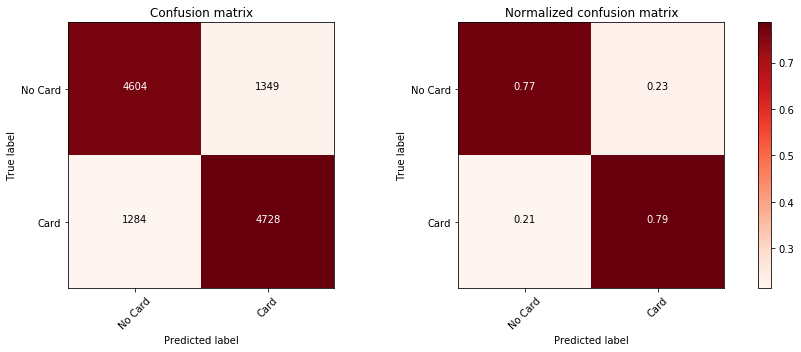

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_resampled, y_pred2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['No Card', 'Card'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['No Card', 'Card'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

In [21]:
logr2 = LogisticRegression(C=0.01)
logr2.fit(X_train_resampled, y_train_resampled)
y_pred3 = logr2.predict(X_test_resampled)
print('LogR Accuracy Score: ', accuracy_score(y_test_resampled, y_pred3))
print('LogR 5 Cross Validation Scores: ', cross_val_score(logr2, X_train_resampled, y_train_resampled, cv=5))
print('LogR F1 Scores: ', f1_score(y_test_resampled, y_pred3, average=None))

LogR Accuracy Score:  0.797492687003761
LogR 5 Cross Validation Scores:  [0.79 0.79 0.79 0.79 0.79]
LogR F1 Scores:  [0.8 0.8]


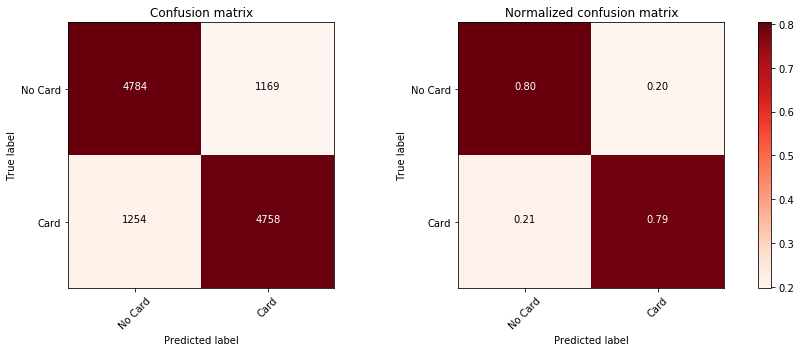

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_resampled, y_pred3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['No Card', 'Card'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['No Card', 'Card'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()